<a href="https://colab.research.google.com/github/o93/sandbox/blob/main/%E8%AA%A4%E5%B7%AE%E3%83%BB%E6%9B%96%E6%98%A7%E3%81%95%E3%83%BB%E4%B8%8D%E7%A2%BA%E3%81%8B%E3%81%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 準備

In [12]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%precision 3
np.set_printoptions(precision=3)

# 既知

## 差

### 1つの値

In [ ]:
target_value = 5
sample_value = 3.6

target_value - sample_value

1.400

### 複数の値

In [ ]:
target_values = np.array([1, 2, 3, 4, 5])
sample_values = np.array([0.9, 1.7, 3.12, 3.87, 5.02])

target_values - sample_values

array([ 0.1 ,  0.3 , -0.12,  0.13, -0.02])

## MAE

### NumPy

In [ ]:
float(np.mean(np.abs(target_values - sample_values)))

0.134

### scikit-learn

In [ ]:
from sklearn.metrics import mean_absolute_error

float(mean_absolute_error(target_values, sample_values))

0.134

## MSE

### NumPy

In [ ]:
float(np.mean(np.square(target_values - sample_values)))

0.026

### scikit-learn

In [ ]:
from sklearn.metrics import mean_squared_error

float(mean_squared_error(target_values, sample_values))

0.026

## RMSE

### NumPy

In [ ]:
float(np.sqrt(np.mean(np.square(target_values - sample_values))))

0.162

### scikit-learn

In [ ]:
float(np.sqrt(mean_squared_error(target_values, sample_values)))

0.162

## 正解率

### NumPy

In [ ]:
target_values = np.array([0, 0, 1, 1, 0, 1])
sample_values = np.array([0, 0, 1, 1, 1, 1])

float((target_values == sample_values).sum() / target_values.shape[0])

0.833

scikit-learn

In [ ]:
from sklearn.metrics import accuracy_score

float(accuracy_score(target_values, sample_values))

0.833

# 未知

## 偏差

In [ ]:
sample_values = np.array([3.948, 4.42, 3.81, 4.219, 4.03, 4.1, 3.97, 4.35, 3.7, 3.9])

m = sample_values.mean()
print(m)
print(sample_values - m)

4.0447
[-0.097  0.375 -0.235  0.174 -0.015  0.055 -0.075  0.305 -0.345 -0.145]


## 標準偏差

### 連続値

In [ ]:
float(sample_values.std())

0.219

### 2値

2値のデータを擬似的に作成

In [2]:
np.random.seed(0)
data = (np.random.rand(113) <= 0.05).astype(np.uint8)
data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=uint8)

そのまま平均値／標準偏差を求めてみる

In [3]:
float(data.mean()), float(data.std())

(0.044, 0.206)

サンプリングして平均の算出を繰り返す

In [4]:
np.random.seed(0)
upsampling_data = np.tile(data, 100)

means = []
for _ in range(1000):
    m = np.random.choice(upsampling_data, data.shape[0]).mean()
    means.append(m)
float(data.mean()), float(np.std(means))

(0.044, 0.019)

分布を表示

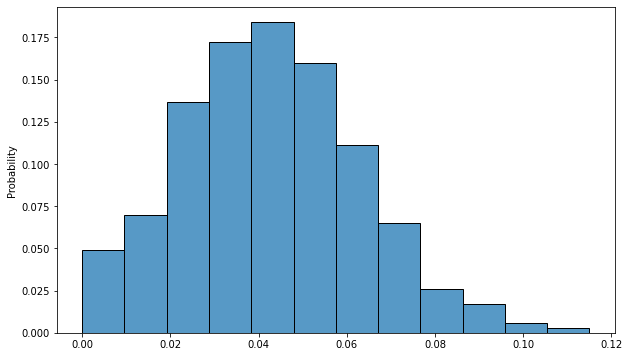

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(means, bins=12, stat='probability')
plt.show()

# おまけ

## PyMC3による確認

インストール

In [7]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 3.9 MB/s 
     |████████████████████████████████| 1.8 MB 19.3 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=b624dda1787084887dc9b2c9809360c8cc6f9e4c53121fb1e7efcdbfe8afa58a
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


データ生成

113 5


/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


<ipython-input-10-0f2221e27e14>:10: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, figsize=(16, 4))


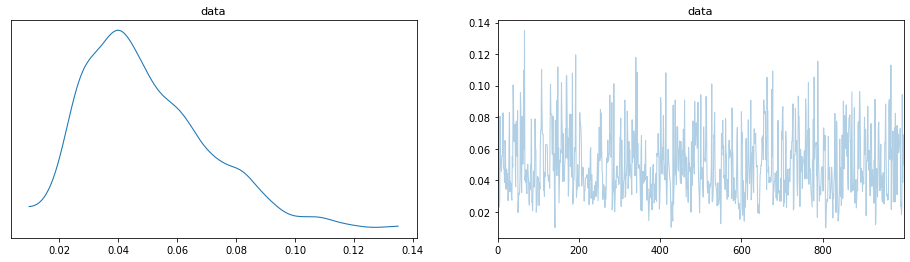

In [10]:
import pymc3 as pm

n, cv = data.shape[0], data.sum()
print(n, cv)

with pm.Model() as model:
    theta = pm.Uniform('data', lower=0, upper=1, shape=1)
    obs = pm.Binomial('DATA', p=theta, n=[n], observed=[cv])
    trace = pm.sample(1000, chains=1)
    pm.traceplot(trace, figsize=(16, 4))

HDI

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


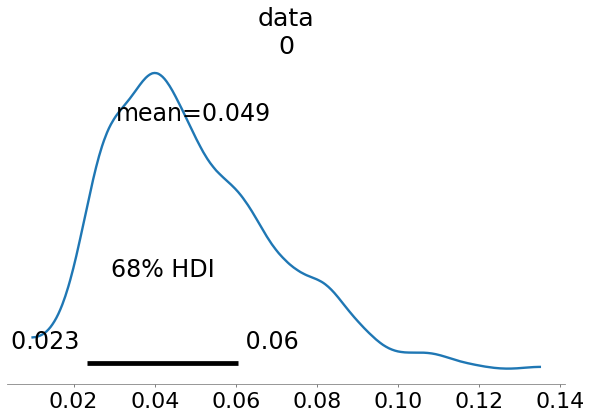

In [17]:
pm.plot_posterior(trace, figsize=(10, 6), hdi_prob=0.6827)

標準偏差

In [19]:
float(trace['data'].std())

0.021

比較

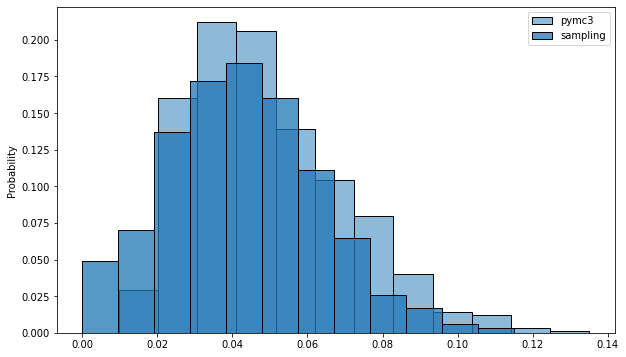

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(trace['data'], bins=12, stat='probability', label='pymc3')
sns.histplot(means, bins=12, stat='probability', label='sampling')
plt.legend()
plt.show()